# Bike Sharing Assignment - Exploratory Data Analysis


## Step1: Data Sourcing

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
def read_csv(file_path):
    """
    Read csv file and return a pandas dataframe

    Parameters
    ----------
    file_path : str
        The path to the csv file

    Returns
    -------
    pandas.DataFrame
        The data from the csv file
    """

    data =  pd.read_csv(file_path, engine='python', encoding='utf-8')
    return data

In [6]:
file_path = "C:/Python Repo/bike-sharing-prediction/data/raw_data.csv"
raw_data = read_csv(file_path)
raw_data.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Step 2 : EDA

In [12]:
def data_stats(data):
    """
    Print the statistics of the data

    Parameters
    ----------
    data : pandas.DataFrame
        The data to be analyzed
    """

    null_count = (raw_data.isna() == True).sum().sort_values(ascending=False)
    print(f"Null Counts: {null_count} \n\n")

    unique_counts = data.apply(lambda x: x.nunique())
    print(f"Unique Counts: {unique_counts} \n\n")
    non_unique_columns = unique_counts[unique_counts == 1].index
    print(f"Non-Unique Columns: {non_unique_columns} \n\n")

    duplicated_rows = data.duplicated().sum()
    print(f"Duplicated Rows: {duplicated_rows} \n\n")

    print("Column Statistics:")
    for column in data.columns:
        print(raw_data[column].value_counts(ascending=False), "\n\n\n")


In [13]:
# Checking the data imported
print(f"The shape of the data is {raw_data.shape}")
print(raw_data.info())

data_stats(raw_data)

The shape of the data is (17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
Null Co

In [14]:
# Checking columns and flagging irrelevant columns
raw_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
round(raw_data['cnt'].mean())

189

In [16]:
# Check dtypes for all data
raw_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## EDA Findings : 
- Column "cnt" is our target variable with mean 189
- No null values in the any of the columns.
- No duplicate rows in the data set.
- No columns that has only one value overall for all records
- Columns that could be dropped are "instant", "dteday", "yr", "atemp", "windspeed", "casual", "registered"
    - instant : This columns is just a counter that we donot require for analysis
    - casual and regsitered : Both of these columns are to show the type of users , this is irrelevant to our analysis
    - atemp : atemp is adjusted temperature , since we already have temparature we will drop this column
    - dteday : Since we already have day, month and year we donot need date

## Step 3 : Data visualization

In [17]:
# Plotting scatter plot for all columns
sns.pairplot(raw_data)
plt.show()

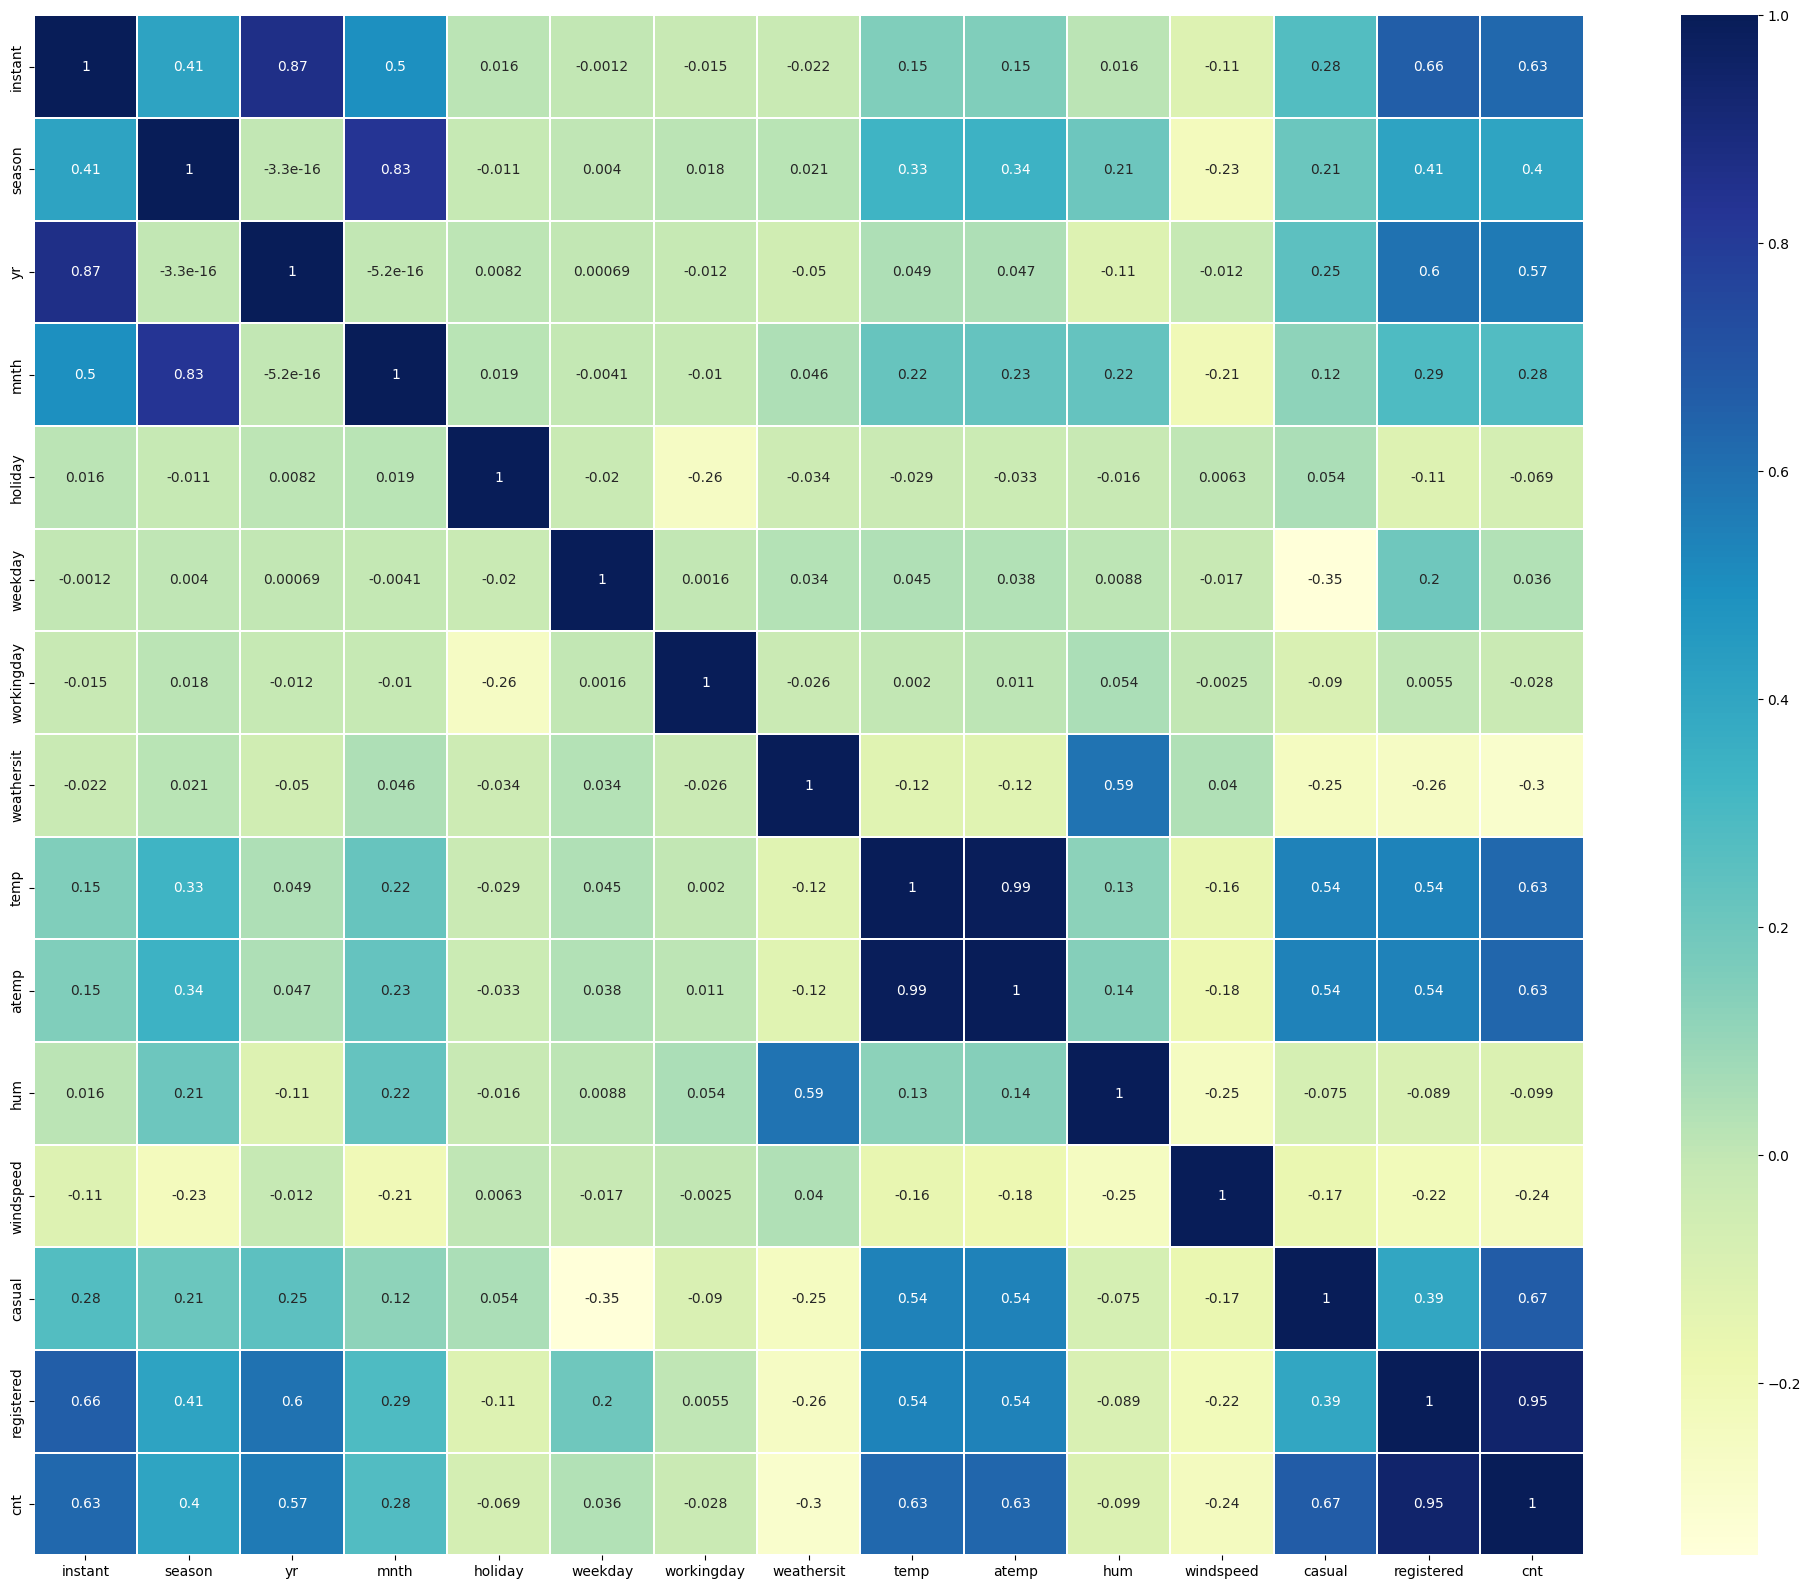

In [70]:
# Plotting correlation heatmat
plt.figure(figsize = (25,20))
sns.heatmap(raw_data.corr(), annot = True,cmap='YlGnBu', linewidths=0.3)
plt.show()

In [67]:
def barplot(column_list):
    """
    Plot a barplot for each column against the target column

    Parameters
    ----------
    column_list : list
        The list of columns to plot
    """

    for column in column_list:
        print(f"Plotting {column} against cnt")
        sns.barplot(x=column, y='cnt', data=raw_data)
        plt.figure(figsize=(10, 7))
        plt.show()

Plotting season against cnt


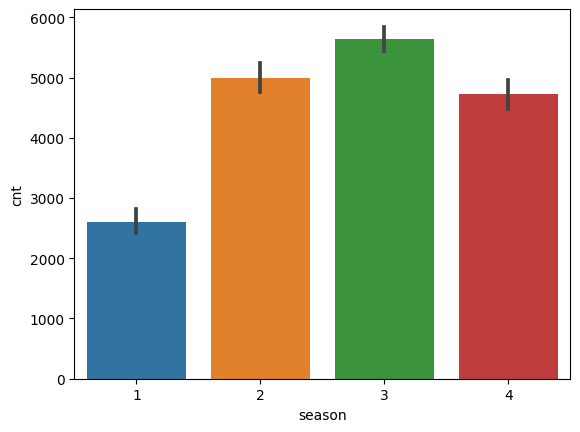

<Figure size 1000x700 with 0 Axes>

Plotting holiday against cnt


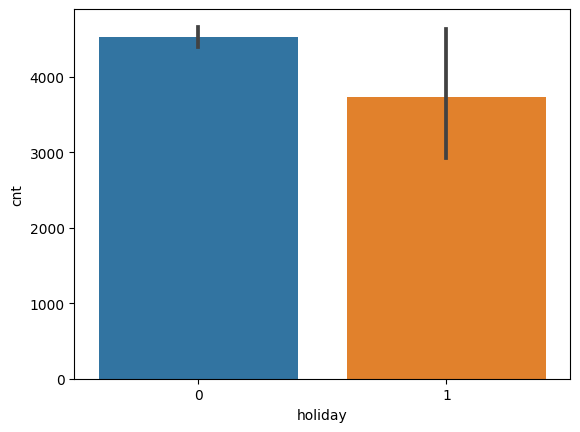

<Figure size 1000x700 with 0 Axes>

Plotting yr against cnt


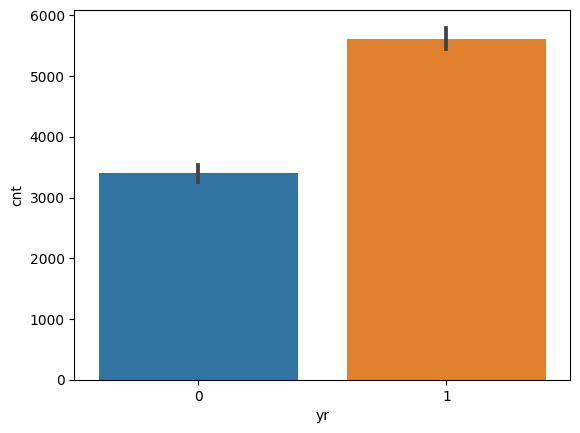

<Figure size 1000x700 with 0 Axes>

Plotting mnth against cnt


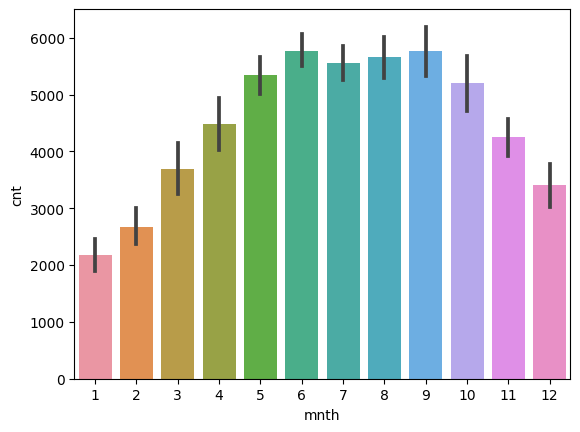

<Figure size 1000x700 with 0 Axes>

Plotting weekday against cnt


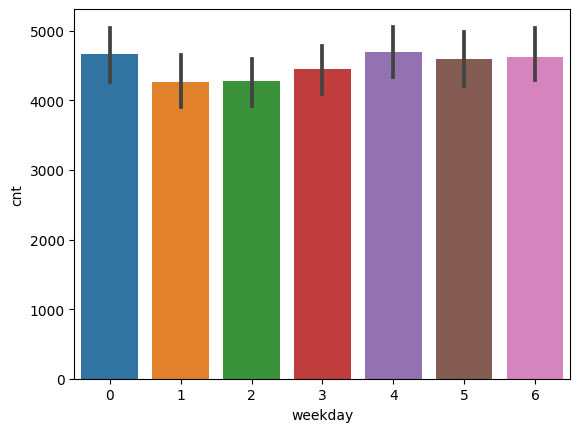

<Figure size 1000x700 with 0 Axes>

Plotting workingday against cnt


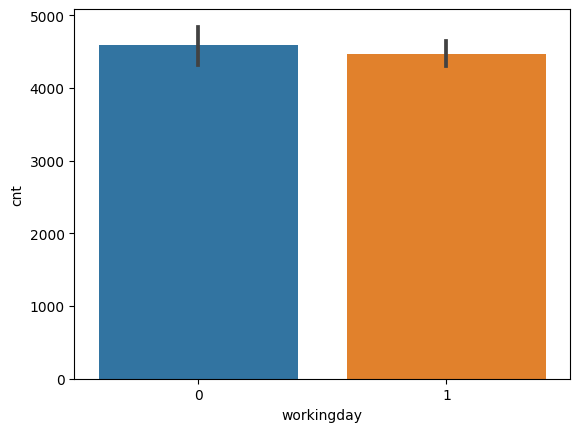

<Figure size 1000x700 with 0 Axes>

Plotting weathersit against cnt


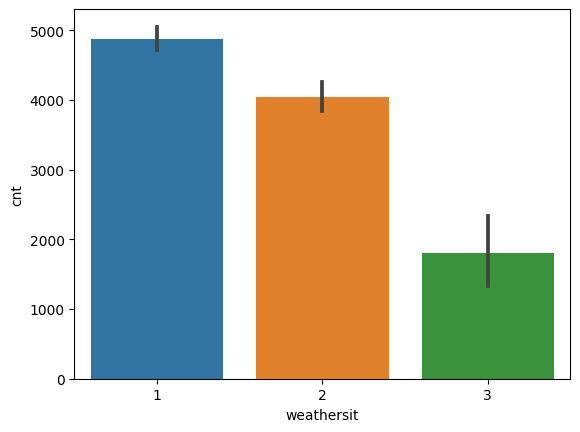

<Figure size 1000x700 with 0 Axes>

In [68]:
# for all these columns call the barplot function to check the distribution of the data
columns_to_plot = ['season', 'holiday', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']
barplot(columns_to_plot)

## Visualisation findings:

- Season 3(fall) has the highest number of bikes rented about 5500
- High bike share from June to Sept and falls before and after those months. June is highest followed by september
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week.
- Non working days have mire number of bikes rented
- The demand is less on holidays and more on non holidays
- Approximately 5000 bikes are rented on a weathersit 1 day being the highest followed by about 4000 weathersit 2 and about 2000 on weathersit3 we dont see any rentals on weathersit 4